In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline

In [34]:
conn = sqlite3.connect('baseline_nexp1_v1.6_10yrs.db')
df = pd.read_sql('select night from summaryallprops;', conn)
conn.close()

In [35]:
night = df['night'].values 

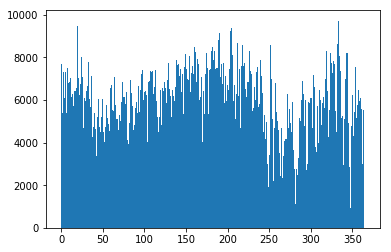

In [36]:
ack = plt.hist(night % 365, bins=np.arange(367)-0.5)

In [29]:
night

array([ 1,  1,  1, ..., 36, 36, 36])

In [30]:
np.size(night)

2220180

In [31]:
print('Fraction of nights with some observations', np.unique(df['night'].values).size/3652)

Fraction of nights with some observations 0.7669769989047097


In [8]:
np.size(night)*30./10./3600.

1850.15

In [45]:
sql = 'select sum(visitexposuretime) as ack from summaryallprops group by night;'
conn = sqlite3.connect('baseline_nexp1_v1.6_10yrs.db')
df = pd.read_sql(sql, conn)

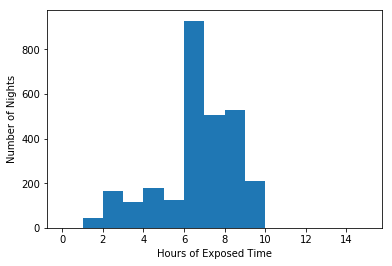

In [62]:
ack = plt.hist(df['ack']/3600, bins=np.arange(16))
plt.xlabel('Hours of Exposed Time')
plt.ylabel('Number of Nights')
plt.savefig('exptiemhist.pdf')

In [22]:
print('mean time the shutter was open in a night=', np.mean(df['ack']/3600))

mean time the shutter was open in a night 6.605319528739746


In [23]:
print('mean time the shutter could have been open in a night=', np.mean(df['ack']/3600/0.77))

mean time the shutter could have been open in a night= 8.578337050311337


In [ ]:
# ah, I've lost the nights with zero exposure time

In [61]:
print('nights with no observations in 10 years', 3686-np.unique(night).size)

nights with no observations in 10 years 885


In [47]:
df['ack'].values

array([28650.,  8520., 27930., ..., 27630.,  8220., 27120.])

In [52]:
# so
nights_w_obs = np.unique(night).size
3652-nights_w_obs

851

In [60]:
(np.mean(df['ack']/3600/0.77)*2801)/3686

6.518698339099853

OK, to recap, 

When we simulate for 3686 days we get:

2801 nights with some observations
885 nights with no observations
for nights with observations, the shutter is open an average of 6.5 hours
for nights with observations, the shutter could have been open an average of 8.6 hours
 